In [1]:
import pandas as pd

In [2]:
#gdis disaster info 
gdis = pd.read_csv('../data/pend-gdis-1960-2018-disasterlocations.csv')

#emdat disaster dataset
# df1 = pd.read_csv('../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv')

In [3]:
#print 
gdis = gdis.drop_duplicates(subset=['id'])
gdis.shape

(9924, 18)

<AxesSubplot:xlabel='year'>

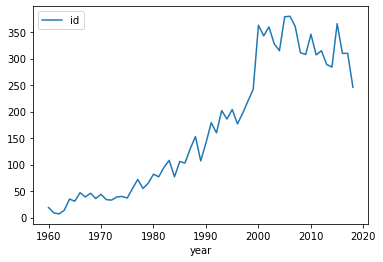

In [4]:
#count number of disasters 
#drop duplicates by disaster id
gdis = gdis.drop_duplicates(subset=['id'])
gdis.groupby('year').agg({'id':'count'}).plot()

<AxesSubplot:xlabel='country'>

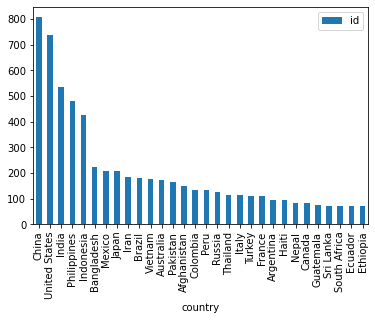

In [5]:
#count number of disasters 
#drop duplicates by disaster id
gdis = gdis.drop_duplicates(subset=['id'])
gdis.groupby('country').agg({'id':'count'}).sort_values(by='id', ascending=False).head(30).plot(kind='bar')

In [11]:
#display the types of disasters 
gdis.disastertype.value_counts()/len(gdis)

flood                   0.430673
storm                   0.286578
earthquake              0.108122
landslide               0.060863
extreme temperature     0.046856
drought                 0.044942
volcanic activity       0.018339
mass movement (dry)     0.003628
Name: disastertype, dtype: float64

In [14]:
len(gdis.iso3.unique())

272

In [19]:
gdis.isna().sum()/len(gdis)

id              0.000000
country         0.000000
iso3            0.014611
gwno            0.011286
year            0.000000
geo_id          0.000000
geolocation     0.000000
level           0.000000
adm1            0.000000
adm2            0.599657
adm3            0.926844
location        0.000000
historical      0.000000
hist_country    0.990226
disastertype    0.000000
disasterno      0.000000
latitude        0.000000
longitude       0.000000
dtype: float64

In [22]:
len(gdis.disastertype.unique())

8

In [71]:
#match economic loss info
#emdat disaster dataset: documentation see https://www.emdat.be/explanatory-notes 
# more guidelines https://www.emdat.be/guidelines 
emdat = pd.read_csv('../data/emdat_public_2022_09_21_query_uid-47Yzpr.csv', skiprows=[0,1,2,3,4,5])
emdat.shape

(16399, 50)

In [72]:
emdat.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [73]:
#disasterno from gdis can be used to link with emdat dataset 
emdat.tail()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
16394,2022-0356-ZAF,2022,356,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16395,2022-0209-COD,2022,209,NaN,Natural,Meteorological,Storm,Convective storm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16396,2022-0255-COD,2022,255,EP-2022-000202,Natural,Biological,Epidemic,Viral disease,NaN,Plague,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,14992.0,Ituri (Adm2).
16397,2022-0263-COD,2022,263,EP-2022-000205,Natural,Biological,Epidemic,Viral disease,NaN,Ebola Virus Disease,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16398,2022-0201-TLS,2022,201,EP-2022-000162,Natural,Biological,Epidemic,Viral disease,NaN,Dengue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Year'>

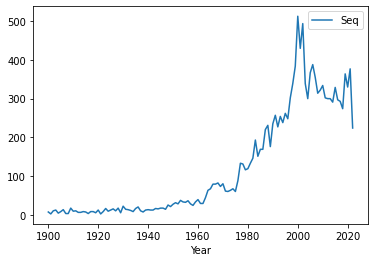

In [77]:
#plot the number of disasters in emdat data set: it goes back to 1900 
emdat = emdat.drop_duplicates(subset=['Dis No'])
emdat.groupby('Year').agg({'Seq':'nunique'}).plot()

In [61]:
#format disasterno to match that of gdis 
emdat['disasterno'] = emdat['Dis No'].str[:-4]

<ipython-input-61-3591c130c506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emdat['disasterno'] = emdat['Dis No'].str[:-4]


In [62]:
#calculate the number of disasters in gdis covered by emdat 
inter=set(emdat['disasterno']).intersection(set(gdis['disasterno']))
len(inter)/len(gdis['disasterno'].unique())

0.9894655134176092

In [66]:
sum(emdat['Latitude'].isna())

12041

In [ ]:
#merge emdat to gdis 
gdis = pd.merge()